In [1]:
import pandas as pd
import numpy as np
import os
import math
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import shapefile
from funciones import get_boundaries, draw_zone_map, draw_region_map

In [ ]:
#df=pd.read_csv('muestra.csv')

In [2]:
ruta = "/home/osvaldo/Downloads/nyc_taxi/"
archivo = "2018_Yellow_Taxi_Trip_Data.csv"

In [3]:
chunk_list = []
contador = 0
for chunk in pd.read_csv(os.path.join(ruta,archivo),chunksize = 500000, iterator = True):
    contador += 1
    print(contador)
    chunk_list.append(chunk)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225


In [4]:
df=pd.concat(chunk_list, axis = 0)

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,09/22/2018 11:46:37 PM,09/23/2018 12:07:10 AM,1,8.00,1,N,230,244,2,25.5,0.5,0.5,0.00,0.0,0.3,26.80
1,2,09/22/2018 11:00:43 PM,09/22/2018 11:09:36 PM,1,1.70,1,N,141,163,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
2,2,09/22/2018 11:10:32 PM,09/22/2018 11:25:50 PM,2,3.84,1,N,163,166,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
3,2,09/22/2018 11:27:25 PM,09/22/2018 11:36:29 PM,2,1.80,1,N,166,75,2,8.5,0.5,0.5,0.00,0.0,0.3,9.80
4,2,09/22/2018 11:50:39 PM,09/23/2018 12:01:52 AM,2,2.43,1,N,229,79,1,10.0,0.5,0.5,2.00,0.0,0.3,13.30


In [7]:
df.shape

(112234626, 17)

df=pd.read_csv('')
df.head()

In [8]:
campos_fecha=['tpep_pickup_datetime','tpep_dropoff_datetime']
formato_fecha = '%m/%d/%Y %I:%M:%S %p'
for x in campos_fecha:
    df[x]=pd.to_datetime(df[x],
                         format=formato_fecha)

In [9]:
df['tpep_pickup_datetime'].map(lambda x:x.strftime('%Y')).value_counts().to_frame()

,tpep_pickup_datetime
2018,112233121
2009,585
2008,406
2017,227
2019,181
2002,28
2003,18
2084,16
2020,16
2001,14


In [10]:
for x in campos_fecha:
    df[x]=df[x].map(lambda z:z.replace(year=2018))
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2018-09-22 23:46:37,2018-09-23 00:07:10,1,8.00,1,N,230,244,2,25.5,0.5,0.5,0.00,0.0,0.3,26.80
1,2,2018-09-22 23:00:43,2018-09-22 23:09:36,1,1.70,1,N,141,163,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
2,2,2018-09-22 23:10:32,2018-09-22 23:25:50,2,3.84,1,N,163,166,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
3,2,2018-09-22 23:27:25,2018-09-22 23:36:29,2,1.80,1,N,166,75,2,8.5,0.5,0.5,0.00,0.0,0.3,9.80
4,2,2018-09-22 23:50:39,2018-09-23 00:01:52,2,2.43,1,N,229,79,1,10.0,0.5,0.5,2.00,0.0,0.3,13.30


In [11]:
catalogos=[('VendorID',['Creative Mobile Technologies','VeriFone Inc']),
('RatecodeID',['Standard rate','JFK','Newark',
'Nassau or Westchester','Negotiated','Group ride']),
('payment_type',['Credit card','Cash','No charge',
'Dispute','Unknown','Voided trip'])]

l_cat=[('%s'%x,pd.DataFrame({'col':y},index=[j for j in range(1,len(y)+1)])\
        .reset_index().rename(columns={'index':x,'col':'x_%s'%x})) for x,y in catalogos]

In [12]:
sf=shapefile.Reader('shape/taxi_zones.shp')
fields=[field[0] for field in sf.fields[1:]]
shp_dic=dict(zip(fields,list(range(len(fields)))))
df_loc=pd.DataFrame([dict(zip(fields,i)) for i in sf.records()])
df_loc=df_loc.drop('LocationID',axis=1).rename(columns={'OBJECTID':'LocationID'})
df_loc.to_csv('cat_location.csv',index=False)
df_loc.head()

,LocationID,Shape_Leng,Shape_Area,zone,borough
0,1,0.116357,0.000782,Newark Airport,EWR
1,2,0.433470,0.004866,Jamaica Bay,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx
3,4,0.043567,0.000112,Alphabet City,Manhattan
4,5,0.092146,0.000498,Arden Heights,Staten Island


In [13]:
campos_lugar=['PULocationID','DOLocationID']
PU_DO_counts=[df[x].value_counts().to_frame().reset_index()\
     .rename(columns={'index':'LocationID',
                      x:x[:2]+'count'}) for x in campos_lugar]

In [14]:
locations=df_loc[['LocationID','zone']].copy()
for x in campos_lugar:
    aux=('%s'%x,locations.rename(columns={'LocationID':x,'zone':'x_%s'%x}))
    l_cat.append(aux)

In [15]:
l_cat[0][1]

,VendorID,x_VendorID
0,1,Creative Mobile Technologies
1,2,VeriFone Inc


In [16]:
l_cat[1][1].to_csv('cat_ratecode.csv',index=False)
l_cat[1][1]

,RatecodeID,x_RatecodeID
0,1,Standard rate
1,2,JFK
2,3,Newark
3,4,Nassau or Westchester
4,5,Negotiated
5,6,Group ride


In [17]:
l_cat[2][1].to_csv('cat_payment_type.csv',index=False)
l_cat[2][1]

,payment_type,x_payment_type
0,1,Credit card
1,2,Cash
2,3,No charge
3,4,Dispute
4,5,Unknown
5,6,Voided trip


In [18]:
for key,cat in l_cat:
    print(key)
    if key[-2:]=='ID':
        df = df.merge(cat,on=key,
                      how='left').drop(key,axis=1).rename(columns={'x_%s'%key:key[:-2]})
    else:
        df = df.merge(cat,on=key,
                      how='left').drop(key,axis=1).rename(columns={'x_%s'%key:key})

VendorID
RatecodeID
payment_type
PULocationID
DOLocationID


In [19]:
df.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Vendor,Ratecode,payment_type,PULocation,DOLocation
112234621,2018-09-22 23:45:24,2018-09-23 00:09:13,1,3.50,N,17.0,0.5,0.5,1.00,0.0,0.3,19.30,VeriFone Inc,Standard rate,Credit card,East Chelsea,Battery Park City
112234622,2018-09-22 23:05:37,2018-09-22 23:16:16,1,1.98,N,9.5,0.5,0.5,2.16,0.0,0.3,12.96,VeriFone Inc,Standard rate,Credit card,Lenox Hill West,Midtown North
112234623,2018-09-22 23:18:34,2018-09-22 23:47:05,1,4.80,N,21.0,0.5,0.5,4.46,0.0,0.3,26.76,VeriFone Inc,Standard rate,Credit card,Midtown North,Greenpoint
112234624,2018-09-22 23:26:11,2018-09-22 23:48:54,2,2.19,N,15.0,0.5,0.5,3.26,0.0,0.3,19.56,VeriFone Inc,Standard rate,Credit card,East Village,East Chelsea
112234625,2018-09-22 23:52:30,2018-09-23 00:01:50,2,1.24,N,8.0,0.5,0.5,0.00,0.0,0.3,9.30,VeriFone Inc,Standard rate,Cash,East Chelsea,Clinton East


In [15]:
df.isna().values.any()

True

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112234626 entries, 0 to 112234625
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        int64         
 3   trip_distance          float64       
 4   store_and_fwd_flag     object        
 5   fare_amount            float64       
 6   extra                  float64       
 7   mta_tax                float64       
 8   tip_amount             float64       
 9   tolls_amount           float64       
 10  improvement_surcharge  float64       
 11  total_amount           float64       
 12  Vendor                 object        
 13  Ratecode               object        
 14  payment_type           object        
 15  PULocation             object        
 16  DOLocation             object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(6)
memory 

In [21]:
cols_nas=[x for x in df.columns if df[x].isna().values.any()]
for x in cols_nas:
    print(x)
    print(df[x].isna().value_counts()[1])
    print(round(df[x].isna().value_counts(True)[1]*100,4),'%','\n')

Vendor
491751
0.4381 % 

Ratecode
5222
0.0047 % 

PULocation
1825820
1.6268 % 

DOLocation
1856259
1.6539 % 



In [22]:
cols_nas

['Vendor', 'Ratecode', 'PULocation', 'DOLocation']

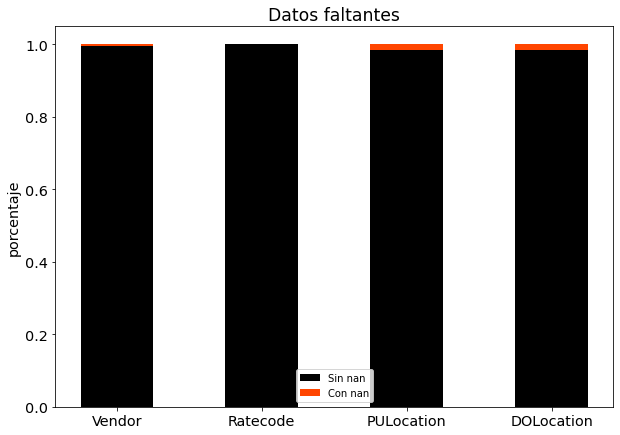

In [23]:
with_nas = [df[col].isna().value_counts(normalize = True)[1] for col in cols_nas]
without_nas = [df[col].isna().value_counts(normalize = True)[0] for col in cols_nas]

ind=np.arange(len(cols_nas))

plt.subplots(figsize=(10,7))
plt.bar(ind, without_nas, width=0.5,label='Sin nan',color='black')
plt.bar(ind, with_nas, width=0.5,bottom=without_nas,label='Con nan',color='orangered')
plt.ylabel('porcentaje',size='x-large')
plt.title('Datos faltantes',size='xx-large')
plt.xticks(ind,cols_nas,size='x-large')
plt.yticks(size='x-large')
plt.legend(loc = "lower center")
plt.show()

In [24]:
variables_categoricas=['Ratecode','store_and_fwd_flag','Vendor',
                       'passenger_count','payment_type',
                       'PULocation', 'DOLocation']
cant_val = [len(df[i].unique()) for i in variables_categoricas]
pd.DataFrame( {"variable":variables_categoricas, "# valores que toma":cant_val})

,variable,# valores que toma
0,Ratecode,7
1,store_and_fwd_flag,2
2,Vendor,3
3,passenger_count,12
4,payment_type,5
5,PULocation,261
6,DOLocation,261


In [25]:
frecuencias=[]
for i in variables_categoricas:
    aux=df[i].reset_index().groupby(i)\
    .agg('count').rename(columns={'index':'frec'})

    if i not in [variables_categoricas[x] for x in (-1,-2,-4)]: #Nos interesa que algunos campos queden
        aux=aux.sort_values('frec',ascending=False)             #ordenados por orden alfabético por lo que
                                                                #los excluimos del ordenamiento por frecuencia
    aux['frec %']=aux['frec']/len(df) #frecuencia relativa
    aux['acum']=aux['frec'].cumsum()  #frecuencia acumulada
    aux['acum %']=aux['acum']/len(df) #frecuencia acumulada relativa
    frecuencias.append(aux)
    print(aux,'\n\n')

                            frec    frec %       acum    acum %
Ratecode                                                       
Standard rate          108895988  0.970253  108895988  0.970253
JFK                      2589646  0.023074  111485634  0.993327
Negotiated                443848  0.003955  111929482  0.997281
Newark                    228859  0.002039  112158341  0.999320
Nassau or Westchester      70115  0.000625  112228456  0.999945
Group ride                   948  0.000008  112229404  0.999953 


                         frec    frec %       acum    acum %
store_and_fwd_flag                                          
N                   111699074  0.995228  111699074  0.995228
Y                      535552  0.004772  112234626  1.000000 


                                  frec    frec %       acum    acum %
Vendor                                                               
VeriFone Inc                  64716535  0.576618   64716535  0.576618
Creative Mobile Technologies

In [56]:
frecuencias[3].round(7)

,frec,frec %,acum,acum %
passenger_count,,,,
0,1003298,0.008939,1003298,0.008939
1,79786664,0.710892,80789962,0.719831
2,16468127,0.146730,97258089,0.866560
3,4684094,0.041735,101942183,0.908295
4,2209579,0.019687,104151762,0.927982
5,5040905,0.044914,109192667,0.972896
6,3040893,0.027094,112233560,0.999991
7,425,0.000004,112233985,0.999994
8,349,0.000003,112234334,0.999997


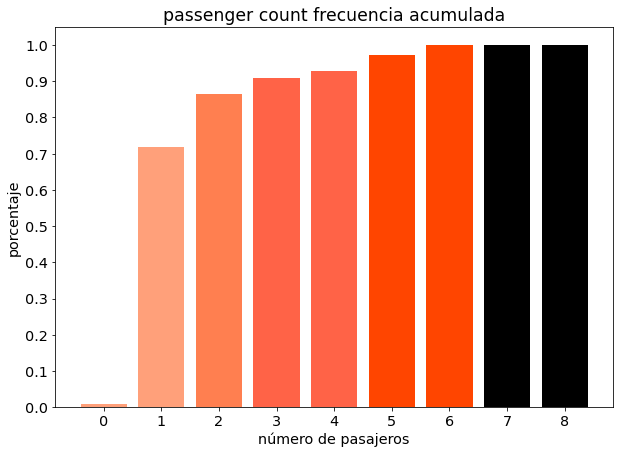

In [23]:
lista_acumulado=list(frecuencias[3]['acum %'])
l,c,t,o,b='lightsalmon','coral','tomato','orangered','black' #Colores
plt.subplots(figsize=(10,7))
plt.bar(np.arange(0,len(lista_acumulado)),list(lista_acumulado),
color=[l,l,c,t,t,o,o,b,b])
plt.title('passenger count frecuencia acumulada',size='xx-large')
plt.xlabel('número de pasajeros',size='x-large')
plt.ylabel('porcentaje',size='x-large')
plt.xticks(np.arange(0,len(lista_acumulado)),size='x-large')
plt.yticks(np.arange(0,1.1,0.1),size='x-large')
plt.show()

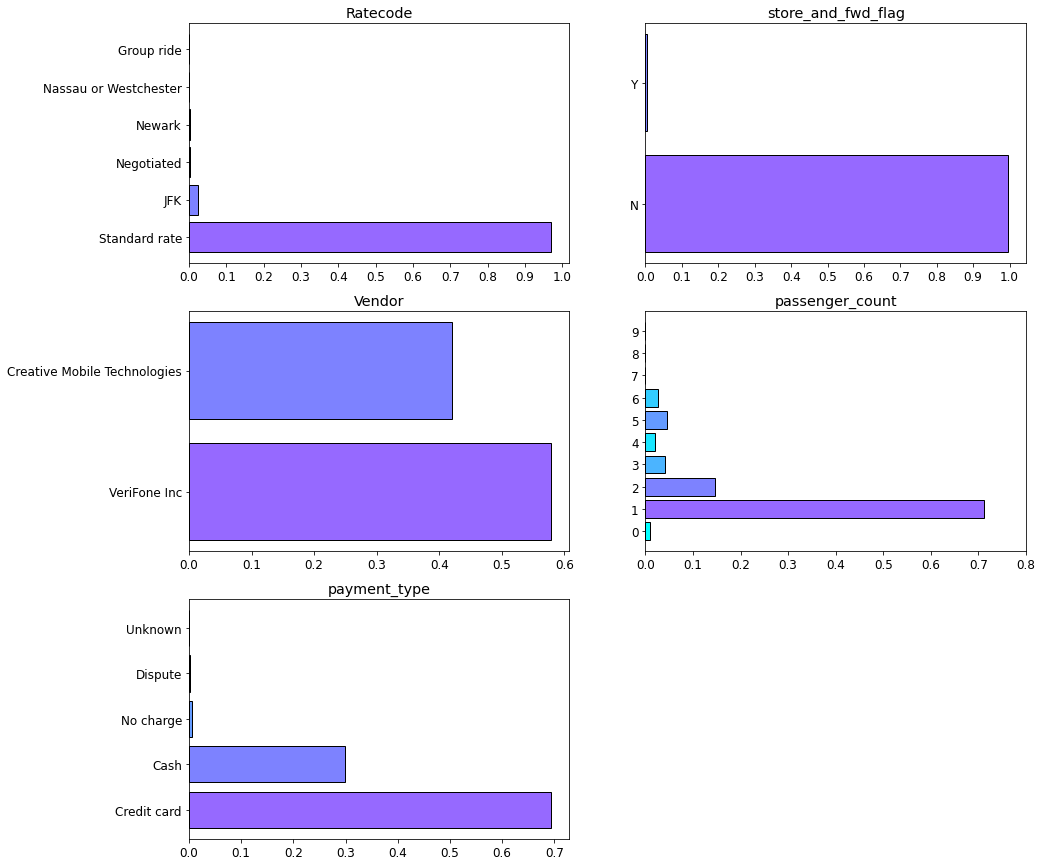

In [57]:
campos=variables_categoricas[:-2]
lista=[df[i].copy().value_counts(True).head(10).to_frame().reset_index().rename(columns={i:'total'}) for i in campos]
colores=plt.get_cmap('cool') 
plt.subplots(figsize=(15,15))
for i,j in enumerate(lista):
    plt.subplot(3,2,i+1)
    plt.barh(j['index'],j.total,
             color=[colores(k) for k in np.arange(0,169,25)[::-1]],
             edgecolor='black')
    if campos[i]=='passenger_count':
        plt.yticks(list(range(lista[i]['index'].max()+1)),size='large')
    else:
        plt.yticks(size='large')
    plt.yticks(size='large')
    maximo=math.ceil(j.total.max()*10)/10
    plt.xticks(np.arange(0,maximo+0.1,0.1),size='large')
    plt.title(campos[i],size='x-large')
    #for k in range(len(lista[i])):
        #plt.text(maximo+maximo*0.05,k-0.1,
                 #'{:,}%'.format(round(j.total[k]*100,4)),size='x-large',color='navy')
plt.show()

In [28]:
aux=pd.concat(PU_DO_counts).merge(df_loc['LocationID'],on='LocationID',how = 'outer').fillna(0)\
                        .groupby(['LocationID'], as_index=False)\
                        .agg({'PUcount': 'sum', 'DOcount': 'sum'})\
                        .sort_values('LocationID')
aux['TOTALcount'] = aux['PUcount'] + aux['DOcount']
aux = aux.merge(df_loc[['LocationID','zone','borough']], left_on='LocationID', right_on='LocationID')
for i in ['PUcount','DOcount','TOTALcount']:
    aux[i]=aux[i].astype(int)

In [29]:
datos_grafica=[(dict(zip(aux['LocationID'].tolist(), 
          aux[x[:2]+'count'].tolist())),aux.sort_values(x[:2]+'count', 
                 ascending=False).set_index('LocationID')) for x in campos_lugar]

In [30]:
datos_grafica[0][1].head().reset_index() #Top 5 zonas con más inicios de viajes

,LocationID,PUcount,DOcount,TOTALcount,zone,borough
0,237,4629205,4047374,8676579,Upper East Side South,Manhattan
1,161,4317981,4250577,8568558,Midtown Center,Manhattan
2,236,4203814,4328633,8532447,Upper East Side North,Manhattan
3,162,3944764,3448376,7393140,Midtown East,Manhattan
4,230,3821688,3471901,7293589,Times Sq/Theatre District,Manhattan


In [31]:
datos_grafica[1][1].head().reset_index() #Top 5 zonas con más terminos de viajes

,LocationID,PUcount,DOcount,TOTALcount,zone,borough
0,236,4203814,4328633,8532447,Upper East Side North,Manhattan
1,161,4317981,4250577,8568558,Midtown Center,Manhattan
2,237,4629205,4047374,8676579,Upper East Side South,Manhattan
3,170,3620862,3588105,7208967,Murray Hill,Manhattan
4,230,3821688,3471901,7293589,Times Sq/Theatre District,Manhattan


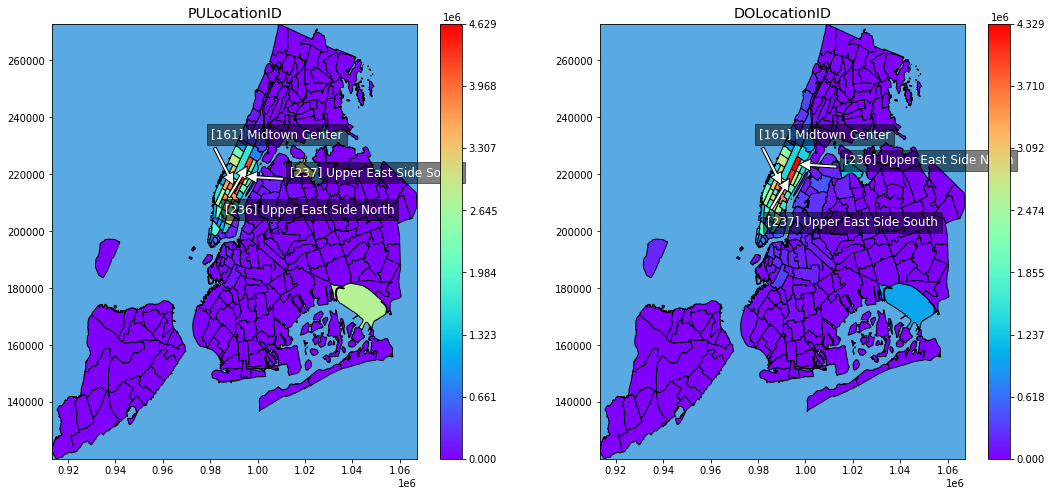

In [32]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,8))
for x,y in enumerate(campos_lugar):
    ax = plt.subplot(1, 2, x+1)
    ax.set_title(y[:2]+'LocationID')
    plt.title(y,size='x-large')
    draw_zone_map(ax,sf,shp_dic,heat=datos_grafica[x][0],text=datos_grafica[x][1].head(3).index.tolist())
plt.show()

In [5]:
variables_continuas=['tpep_pickup_datetime','tpep_dropoff_datetime',
'trip_distance','fare_amount', 'extra','mta_tax','tip_amount',
'tolls_amount','improvement_surcharge','total_amount']

var_descr=variables_continuas #Quitamos los campos de fechas porque 
for i in range(2):            #los trataremos de forma distinta
    var_descr.pop(0)

In [ ]:
dist_campos_fecha=[df[x].map(lambda z:z.strftime('%j')).astype(int)\
                   .value_counts(True).to_frame().reset_index()\
                   .sort_values('index').reset_index().drop('level_0',axis=1)\
                   .rename(columns={'index':'dia_del_anio',x:'total_viajes'}) for x in campos_fecha]

In [32]:
for x in dist_campos_fecha:
    x['x_total_viajes']=x.total_viajes.cumsum()

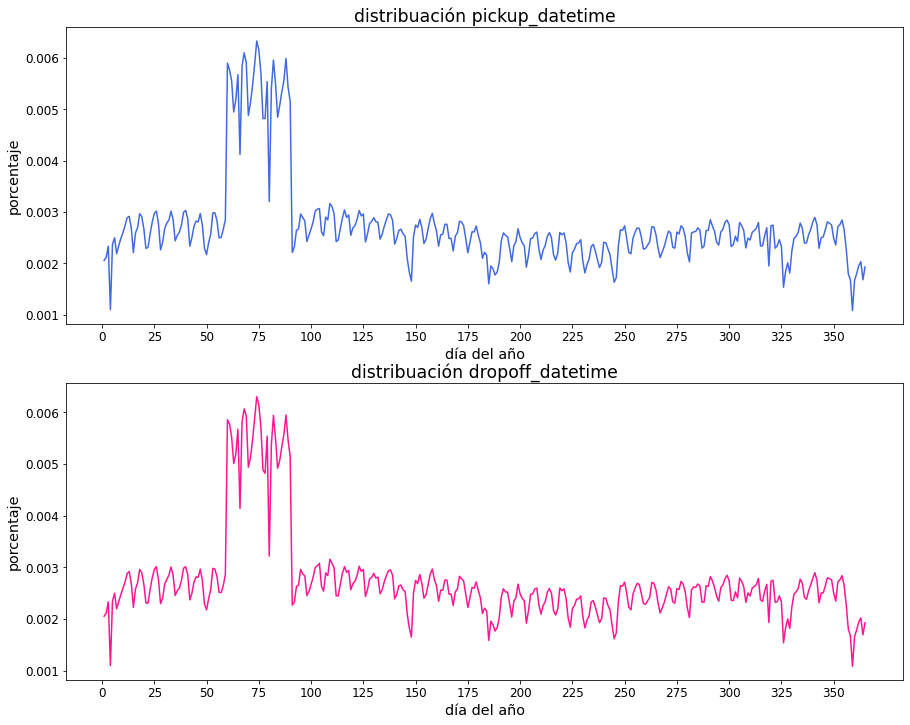

In [33]:
plt.subplots(figsize=(15,12))
titulo=('pickup','dropoff')
colores=('royalblue','deeppink')
for x,y in enumerate(dist_campos_fecha): 
    plt.subplot(2,1,x+1)
    plt.plot(y.dia_del_anio,y.total_viajes,color=colores[x])
    plt.title('distribuación %s_datetime'%(titulo[x]),size='xx-large')
    plt.xticks(np.arange(0,365,25),size='large')
    plt.yticks(size='large')
    plt.xlabel('día del año',size='x-large')
    plt.ylabel('porcentaje',size='x-large')

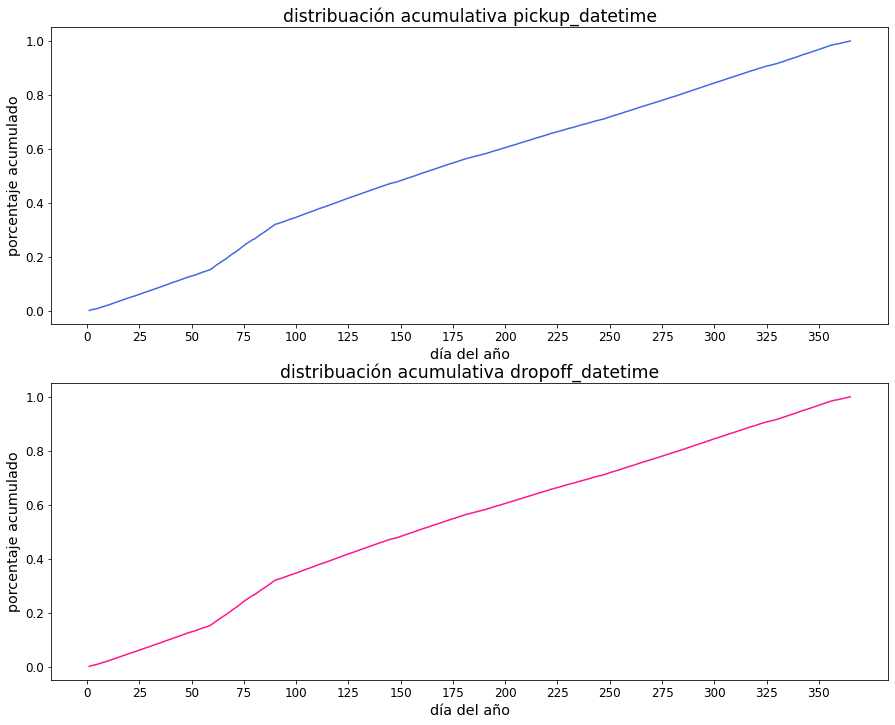

In [34]:
plt.subplots(figsize=(15,12))
titulo=('pickup','dropoff')
colores=('royalblue','deeppink')
for x,y in enumerate(dist_campos_fecha): 
    plt.subplot(2,1,x+1)
    plt.plot(y.dia_del_anio,y.x_total_viajes,color=colores[x])
    plt.title('distribuación acumulativa %s_datetime'%(titulo[x]),size='xx-large')
    plt.xticks(np.arange(0,365,25),size='large')
    plt.yticks(size='large')
    plt.xlabel('día del año',size='x-large')
    plt.ylabel('porcentaje acumulado',size='x-large')

In [ ]:
plt.subplots(figsize=(15,15))

plt.subplot(2,1,1)
plt.title('Distribución tip_amount',size='x-large')
ax=sns.distplot(df.tip_amount, hist = True,
kde = True, bimns=int(abs(max(df.tip_amount.tolist())-min(df.tip_amount.tolist()))),color ='lime',
hist_kws={'edgecolor':'black'},
kde_kws = {'linewidth': 3,'shade':False,'color':'black'})
ax.set_xlim(-2,20)
ax.set_xticks(list(np.arange(-2,21,1)))
ax.set_xlabel('tip_amount',size='x-large')
ax.set_ylabel('Density',size='x-large')

plt.subplot(2,1,2)
ax1=sns.kdeplot(df.tip_amount,cumulative=True,color='lime',linewidth=3)
ax=sns.ecdfplot(df.tip_amount,color='black',linewidth=1)
ax.set_xlim(-2,20)
ax.set_xticks(list(np.arange(-2,21,1)))
ax.set_xlabel('tip_amount',size='x-large')
ax.set_ylabel('Cumulative Density')
plt.show()

/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


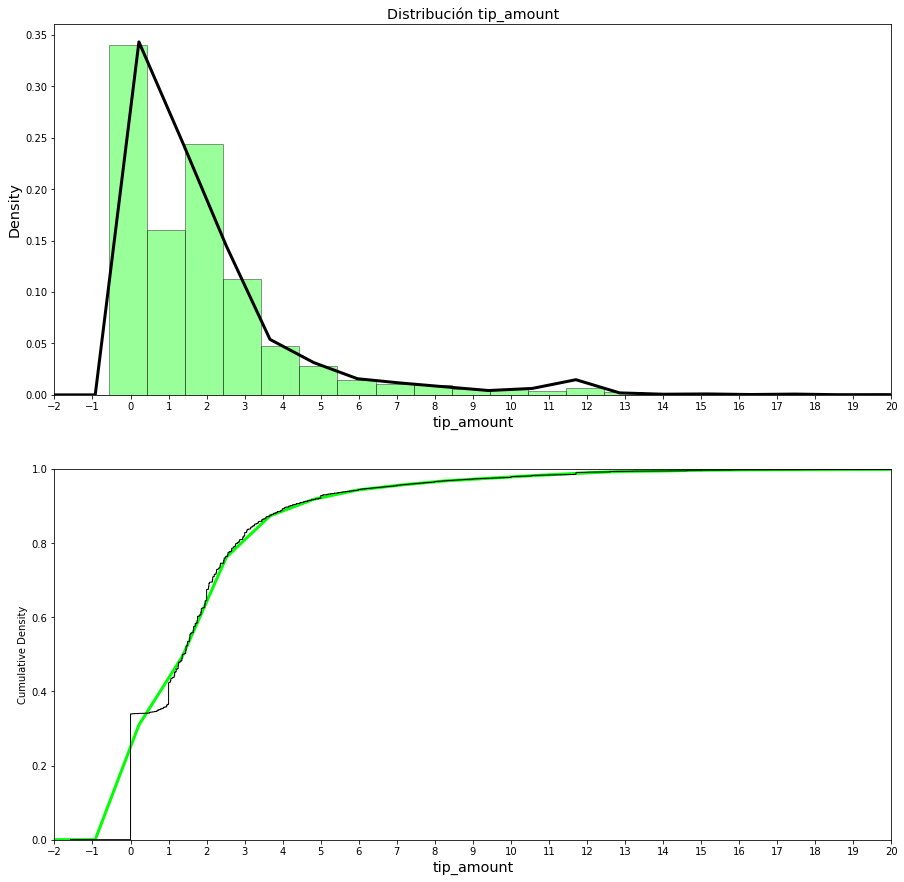

In [35]:
plt.subplots(figsize=(15,15))

plt.subplot(2,1,1)
plt.title('Distribución tip_amount',size='x-large')
ax=sns.distplot(df.tip_amount, hist = True,
kde = True, bins=int(abs(max(df.tip_amount.tolist())-min(df.tip_amount.tolist()))),color ='lime',
hist_kws={'edgecolor':'black'},
kde_kws = {'linewidth': 3,'shade':False,'color':'black'})
ax.set_xlim(-2,20)
ax.set_xticks(list(np.arange(-2,21,1)))
ax.set_xlabel('tip_amount',size='x-large')
ax.set_ylabel('Density',size='x-large')

plt.subplot(2,1,2)
ax1=sns.kdeplot(df.tip_amount,cumulative=True,color='lime',linewidth=3)
ax=sns.ecdfplot(df.tip_amount,color='black',linewidth=1)
ax.set_xlim(-2,20)
ax.set_xticks(list(np.arange(-2,21,1)))
ax.set_xlabel('tip_amount',size='x-large')
ax.set_ylabel('Cumulative Density')
plt.show()

/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


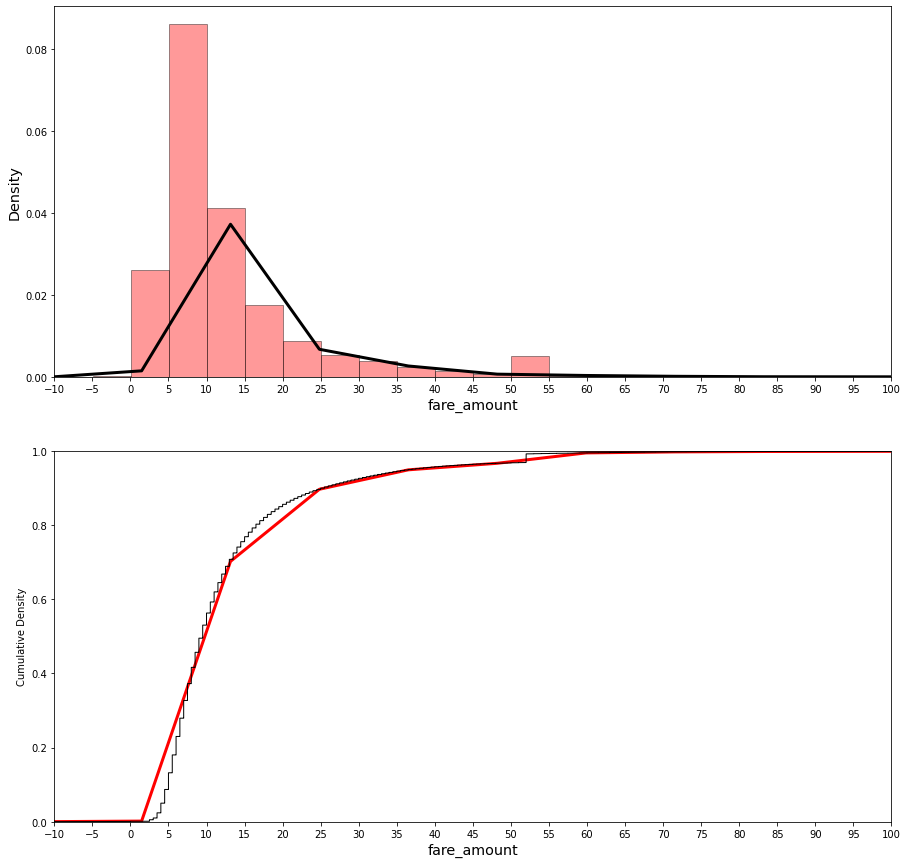

In [36]:
plt.subplots(figsize=(15,15))

plt.subplot(2,1,1)
ax=sns.distplot(df.fare_amount, hist = True,
kde = True, bins=int(abs(max(df.fare_amount.tolist())-min(df.fare_amount.tolist()))/5), color = 'red',
hist_kws={'edgecolor':'black'},
kde_kws = {'linewidth': 3,'shade':False,'color':'black'})
ax.set_xlim(-10,100)
ax.set_xticks(list(np.arange(-10,105,5)))
ax.set_xlabel('fare_amount',size='x-large')
ax.set_ylabel('Density',size='x-large')

plt.subplot(2,1,2)
ax1=sns.kdeplot(df.fare_amount,cumulative=True,color='red',linewidth=3)
ax=sns.ecdfplot(df.fare_amount,color='black',linewidth=1)
ax.set_xlim(-10,100)
ax.set_xticks(list(np.arange(-10,105,5)))
ax.set_xlabel('fare_amount',size='x-large')
ax.set_ylabel('Cumulative Density')
plt.show()

/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


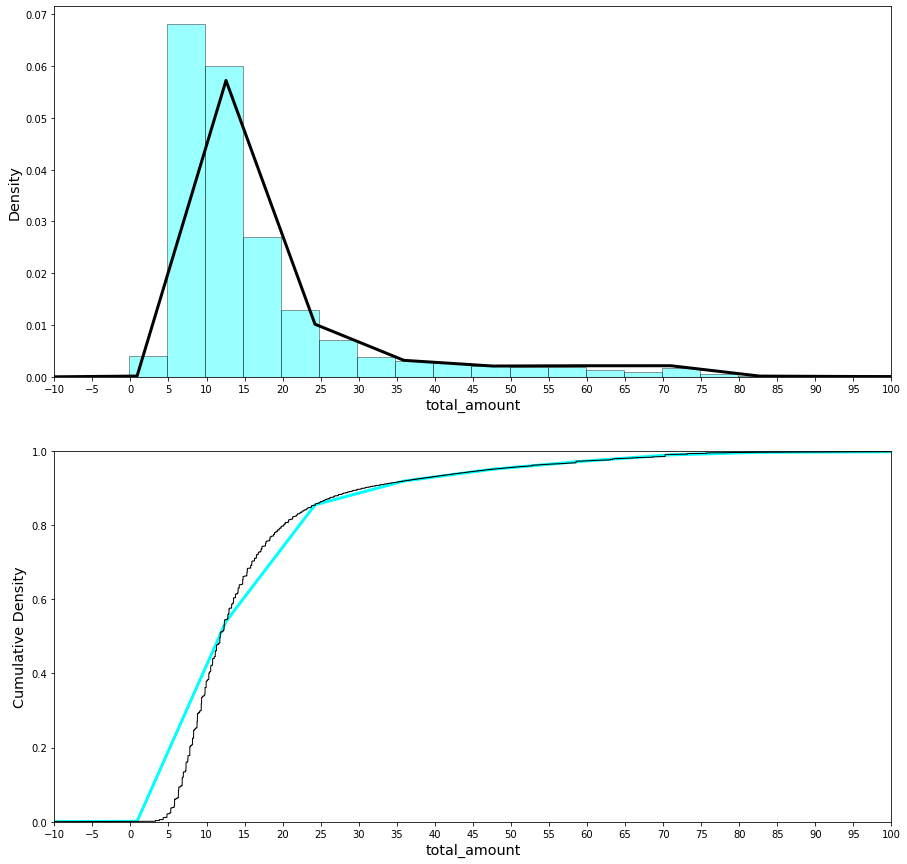

In [37]:
plt.subplots(2,1,figsize=(15,15))
#sns.set(rc={'figure.figsize':(15,6)})
plt.subplot(2,1,1)
ax=sns.distplot(df.total_amount, hist = True,
kde = True, bins=int(abs(max(df.total_amount.tolist())-min(df.total_amount.tolist()))/5), color = 'cyan',
hist_kws={'edgecolor':'black'},
kde_kws = {'linewidth': 3,'shade':False,'color':'black'})
ax.set_xlim(-10,100)
ax.set_xticks(list(np.arange(-10,105,5)))
ax.set_xlabel('total_amount',size='x-large')
ax.set_ylabel('Density',size='x-large')

plt.subplot(2,1,2)
ax1=sns.kdeplot(df.total_amount,cumulative=True,color='cyan',linewidth=3)
ax=sns.ecdfplot(df.total_amount,color='black',linewidth=1)
ax.set_xlim(-10,100)
ax.set_xticks(list(np.arange(-10,105,5)))
ax.set_xlabel('total_amount',size='x-large')
ax.set_ylabel('Cumulative Density',size='x-large')
plt.show()

/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


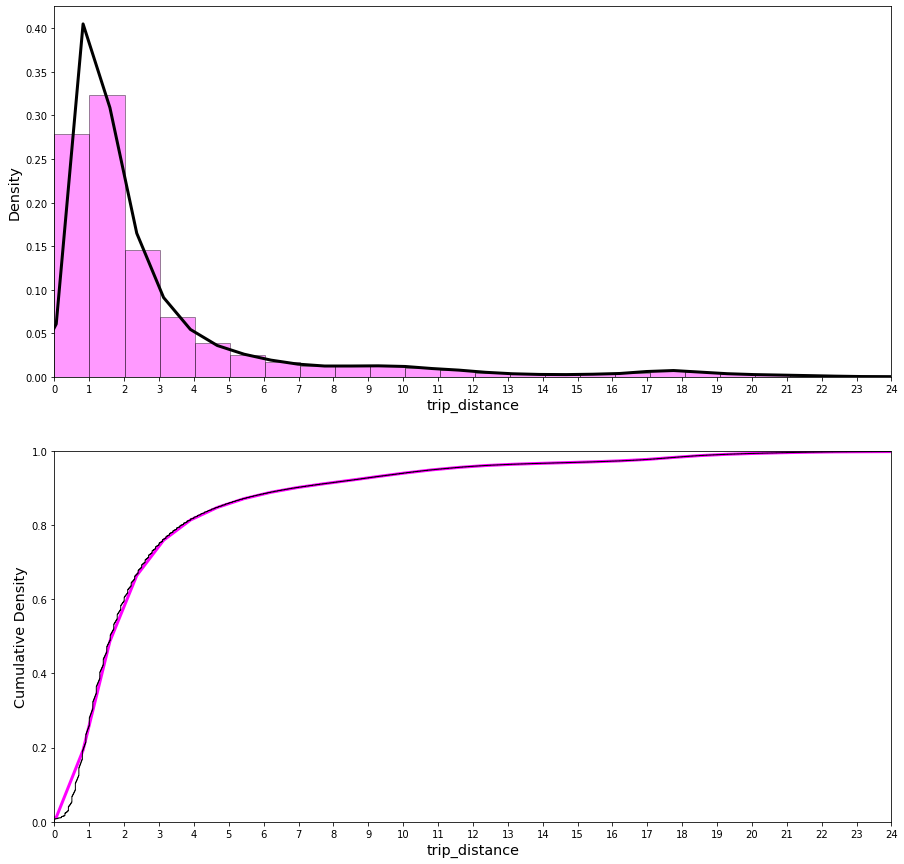

In [38]:
plt.subplots(2,1,figsize=(15,15))

plt.subplot(2,1,1)
ax=sns.distplot(df.trip_distance, hist = True, 
kde = True, bins=int(abs(max(df.trip_distance.tolist())-min(df.trip_distance.tolist()))), color = 'magenta',
hist_kws={'edgecolor':'black'},
kde_kws = {'linewidth': 3,'shade':False,'color':'black'})
ax.set_xlim(0,20)
ax.set_xticks(list(np.arange(0,25,1)))
ax.set_xlabel('trip_distance',size='x-large')
ax.set_ylabel('Density',size='x-large')

plt.subplot(2,1,2)
ax1=sns.kdeplot(df.trip_distance,cumulative=True,color='magenta',linewidth=3)
ax=sns.ecdfplot(df.trip_distance,color='black',linewidth=1)
ax.set_xlim(0,20)
ax.set_xticks(list(np.arange(0,25,1)))
ax.set_xlabel('trip_distance',size='x-large')
ax.set_ylabel('Cumulative Density',size='x-large')
plt.show()

In [8]:
df[var_descr].describe().round(3)

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1000000.000,1000000.000,1000000.000,1000000.000,1000000.000,1000000.000,1000000.000,1000000.000
mean,2.930,12.981,0.331,0.497,1.874,0.346,0.300,16.333
std,3.795,11.938,0.463,0.044,2.625,1.810,0.016,14.627
min,0.000,-300.000,-4.500,-0.500,-1.580,-6.000,-0.300,-300.300
25%,0.960,6.500,0.000,0.500,0.000,0.000,0.300,8.500
50%,1.600,9.500,0.000,0.500,1.400,0.000,0.300,11.800
75%,3.000,14.500,0.500,0.500,2.450,0.000,0.300,17.800
max,151.700,2020.200,18.000,15.000,226.000,765.760,1.000,2020.500


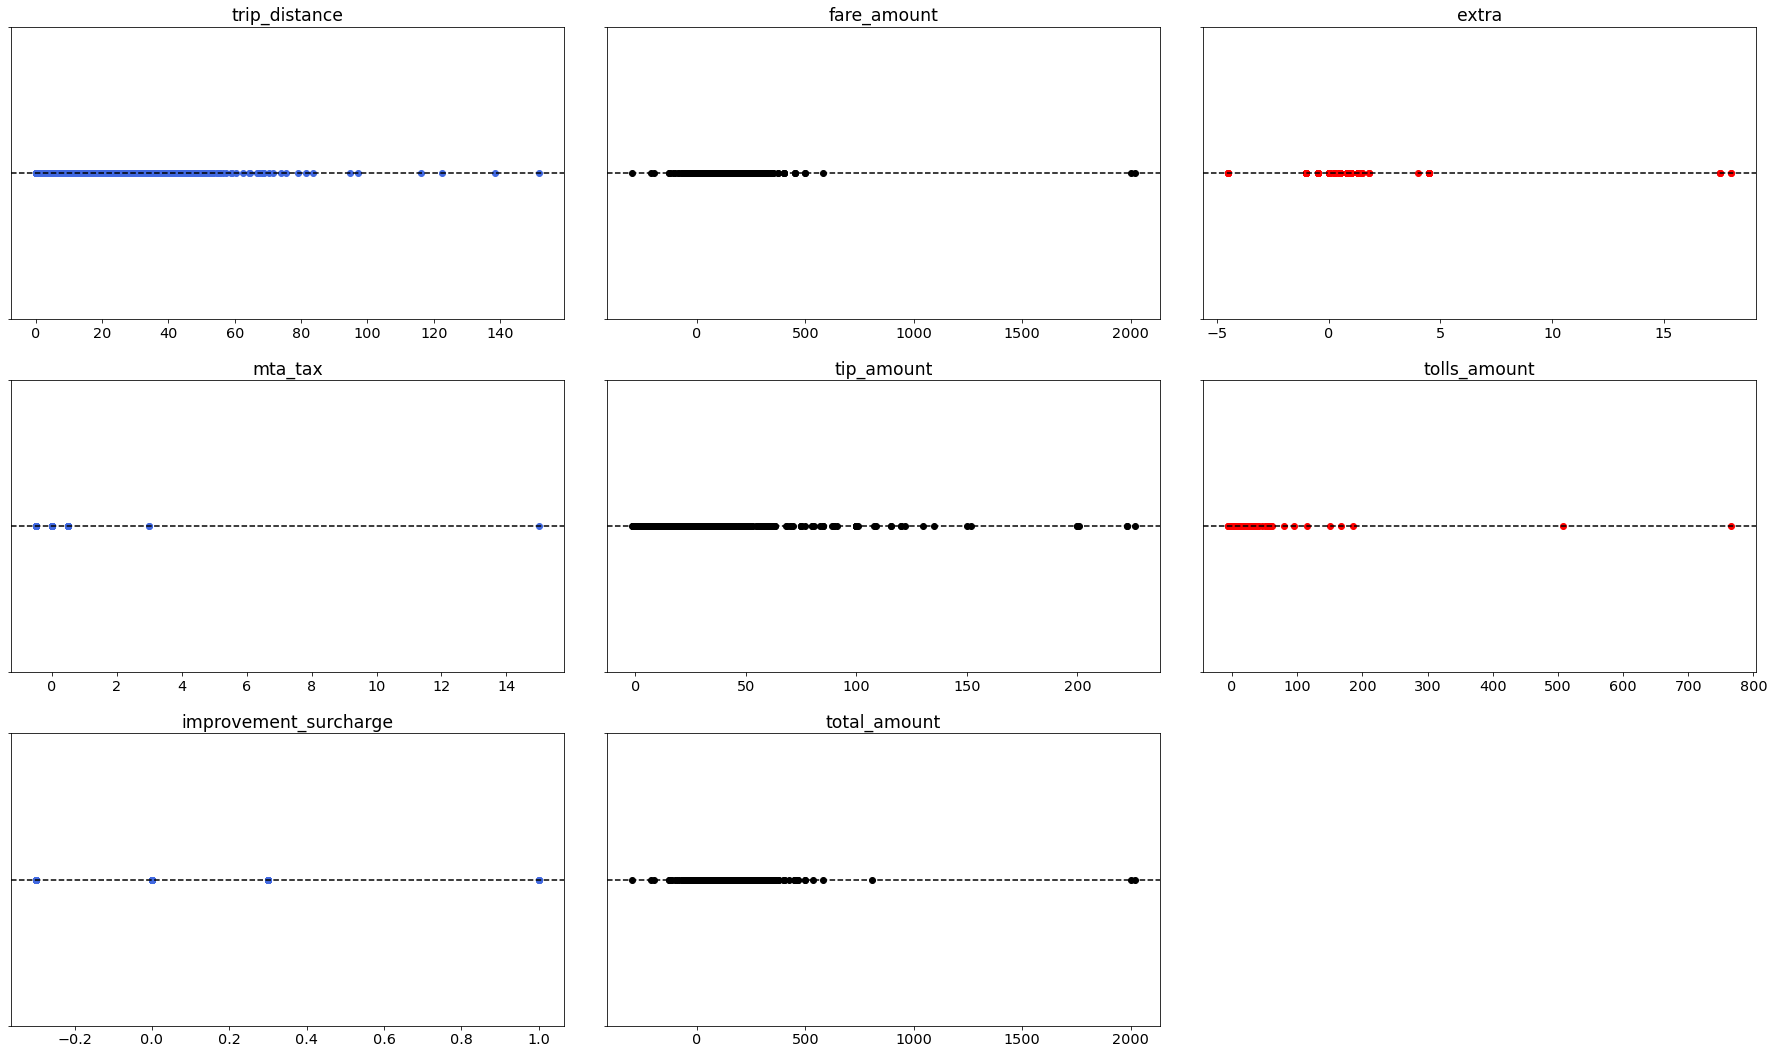

In [40]:
plt.subplots(figsize=(25,15))
r,a,n='red','royalblue','black'
colores=[a,n,r,a,n,r,a,n]
for x,y in enumerate(var_descr):
    plt.subplot(3,3,x+1)
    plt.tight_layout(pad = 2)
    plt.axhline(0,color='black',linestyle='--')
    plt.scatter(df[y],np.zeros(len(df[y])),color=colores[x])
    plt.title(y,size='xx-large')
    plt.ylim(-1,1)
    plt.yticks([-1,1],[])
    plt.xticks(size='x-large')
plt.show()

In [92]:
x=df.loc[df.trip_distance>=21.5].shape[0]
print(x)
print(round(x/len(df),5))

376727
0.00336


In [96]:
x=df.loc[df.trip_distance<=0].shape[0]
print(x)
print(round(x/len(df),5))

764007
0.00681


In [94]:
x=df.loc[df.trip_distance<=0.1].shape[0]
print(x)
print(round(x/len(df),5))

1093323
0.00974


In [95]:
x=df.loc[df.trip_distance<=0.2].shape[0]
print(x)
print(round(x/len(df),5))

1535671
0.01368


In [97]:
x=df.loc[df.total_amount>=85].shape[0]
print(x)
print(round(x/len(df),5))

356245
0.00317


In [98]:
x=df.loc[df.total_amount<=2.5].shape[0]
print(x)
print(round(x/len(df),5))

116201
0.00104


In [47]:
discretizar=['mta_tax','extra','improvement_surcharge'] #Varibles que deberian ser discretas 
                                                        #porque solo pueden tomar valores
for i in discretizar:                                   #en un conjunto finito
    print(df[i].value_counts(True).head().round(6),'\n')

 0.50    0.994897
 0.00    0.004467
-0.50    0.000633
 3.00    0.000001
 0.87    0.000001
Name: mta_tax, dtype: float64 

 0.0    0.533283
 0.5    0.300174
 1.0    0.161928
 4.5    0.004233
-0.5    0.000221
Name: extra, dtype: float64 

 0.3    0.999058
-0.3    0.000650
 0.0    0.000289
 1.0    0.000002
 0.6    0.000000
Name: improvement_surcharge, dtype: float64 



In [6]:
correlacion=df[var_descr].corr()
correlacion

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
trip_distance,1.000000,0.872479,0.097077,-0.097762,0.547560,0.532566,0.018196,0.879143
fare_amount,0.872479,1.000000,0.073875,-0.177097,0.556283,0.500363,0.042555,0.979854
extra,0.097077,0.073875,1.000000,0.041439,0.076176,0.046233,0.035499,0.111528
mta_tax,-0.097762,-0.177097,0.041439,1.000000,-0.114313,-0.201804,0.564336,-0.185106
tip_amount,0.547560,0.556283,0.076176,-0.114313,1.000000,0.384411,0.016429,0.683281
tolls_amount,0.532566,0.500363,0.046233,-0.201804,0.384411,1.000000,0.004980,0.602006
improvement_surcharge,0.018196,0.042555,0.035499,0.564336,0.016429,0.004980,1.000000,0.042224
total_amount,0.879143,0.979854,0.111528,-0.185106,0.683281,0.602006,0.042224,1.000000


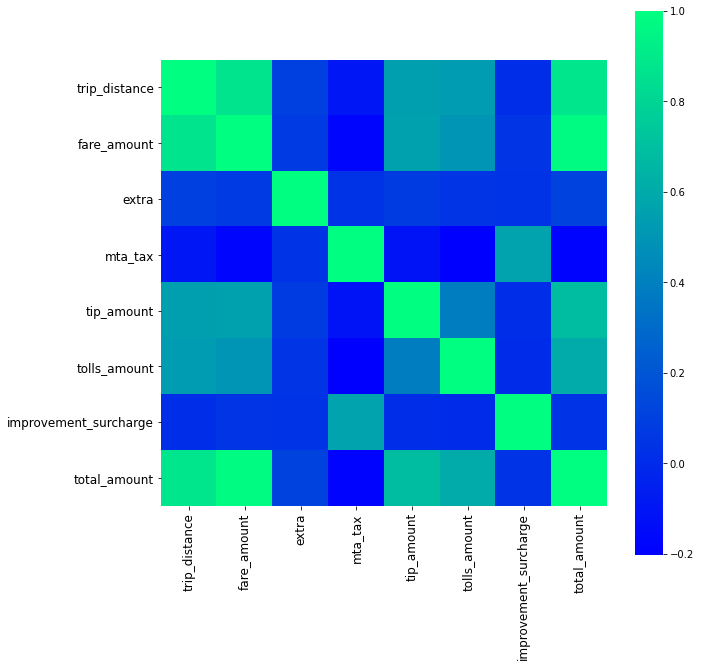

In [43]:
plt.subplots(figsize=(10,10))
ax=sns.heatmap(correlacion,square=True,cmap='winter')
plt.xticks(size='large')
plt.yticks(size='large')
plt.show()

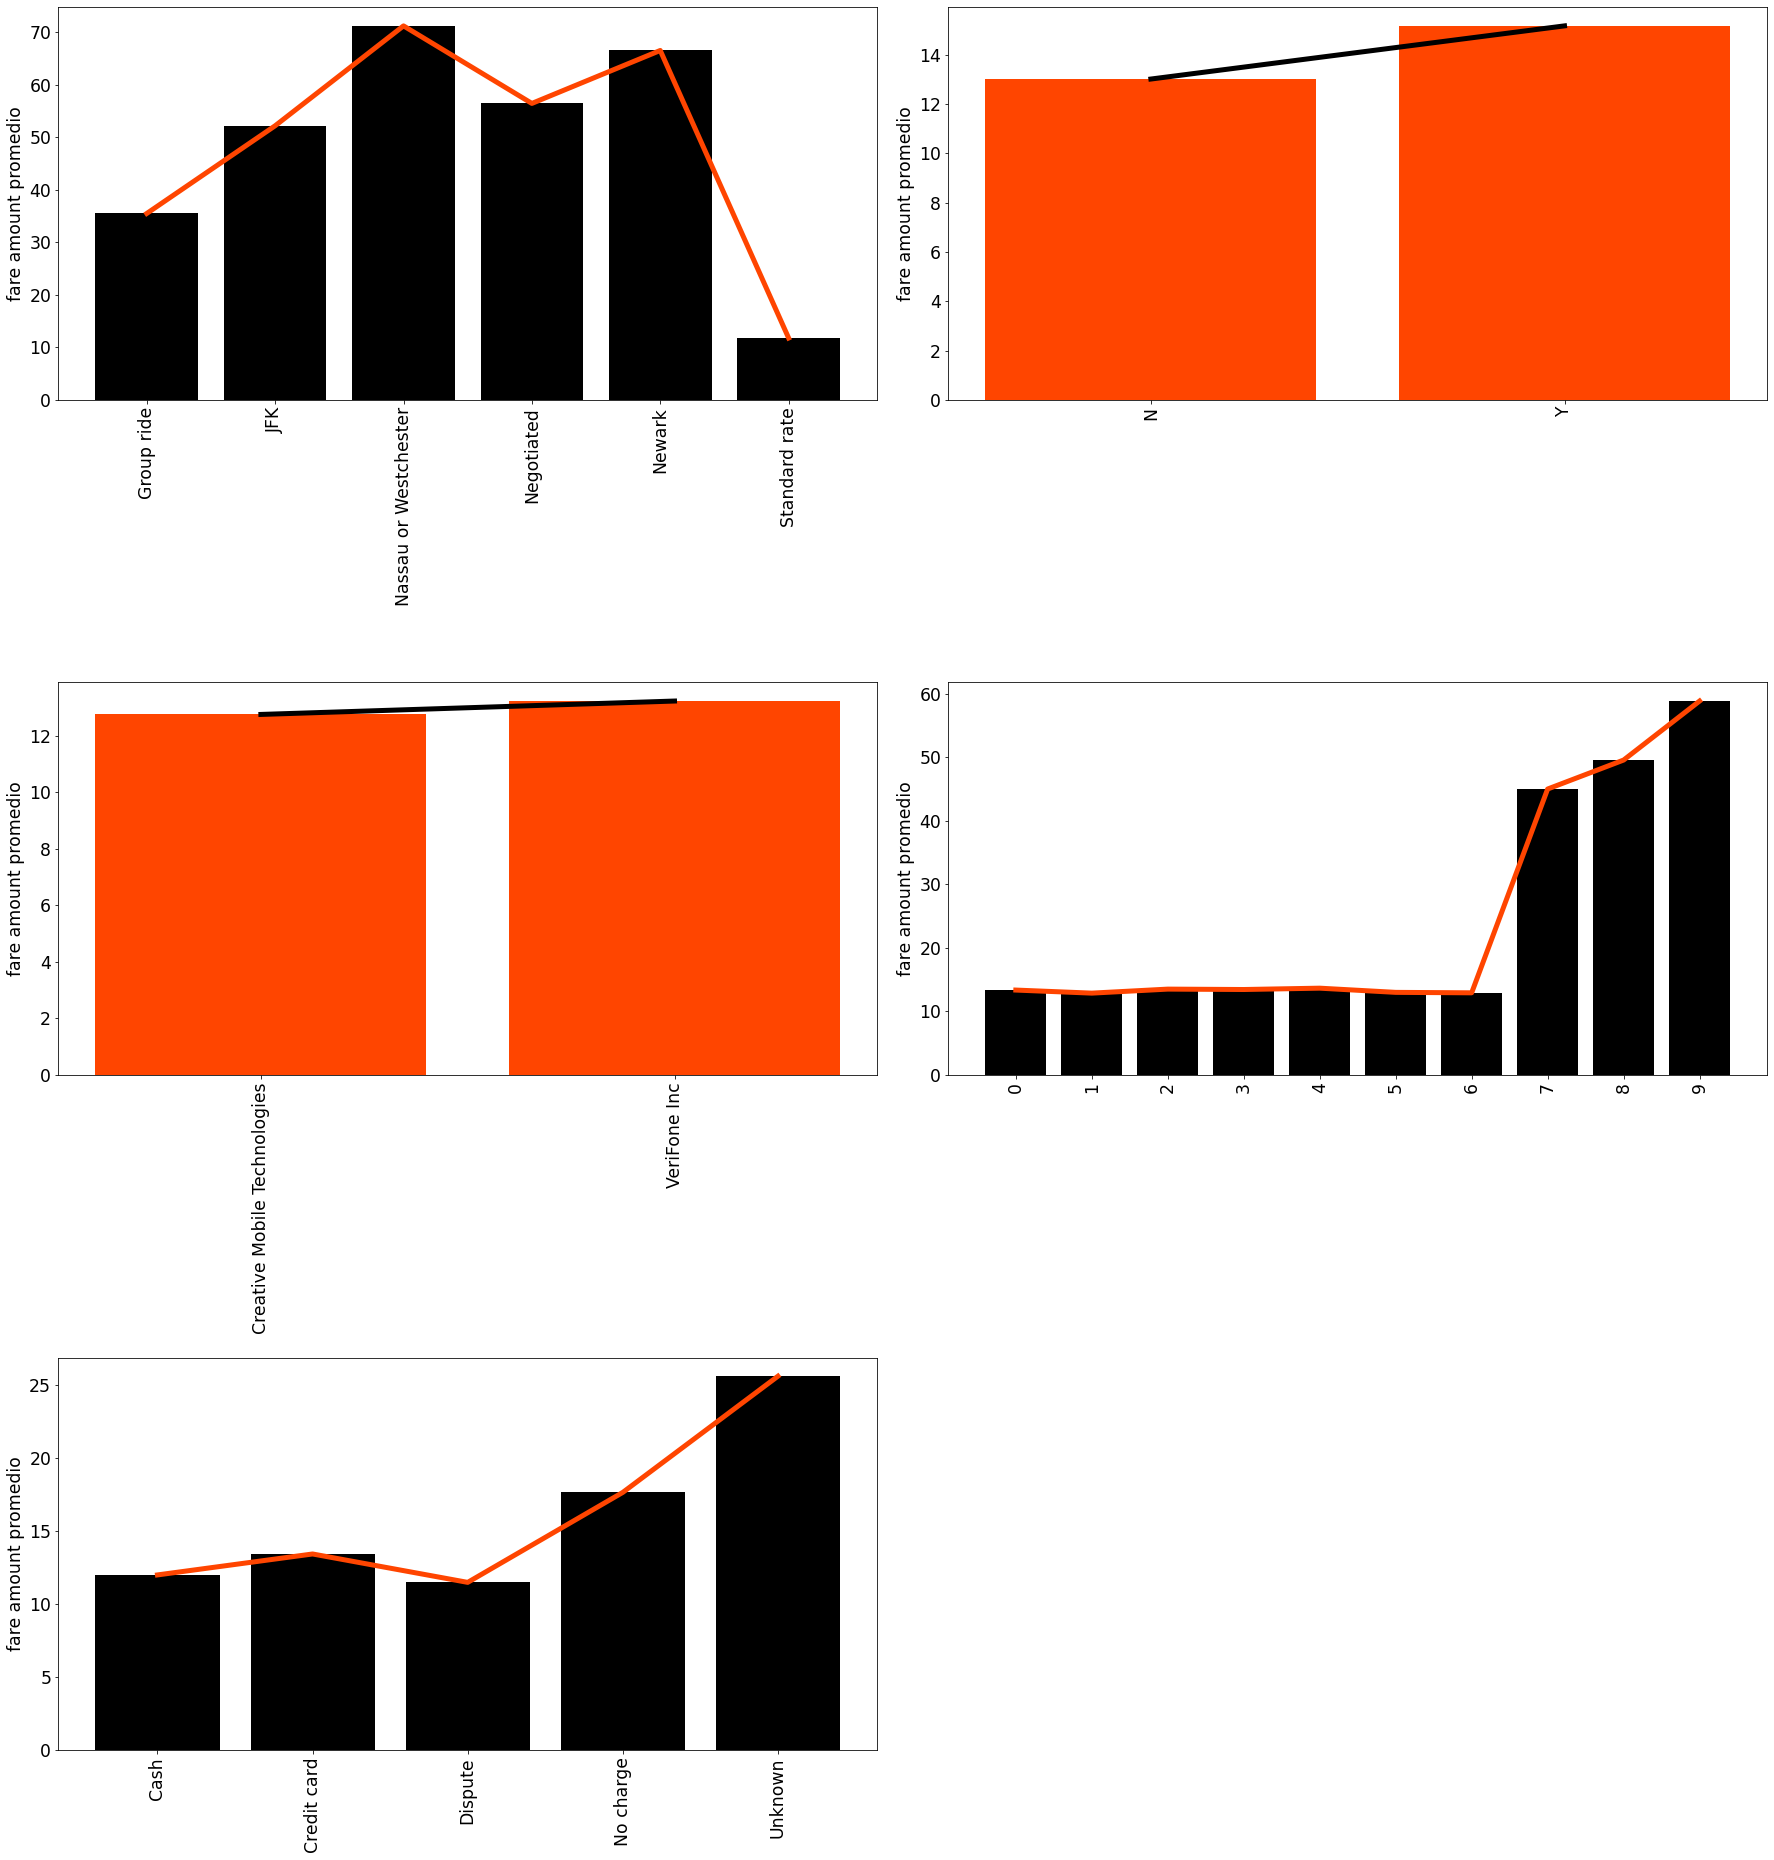

In [58]:
plt.subplots(figsize=(25,25))
colores=[b,o,o,b,b]
colores1=[o,b,b,o,o]
for x,y in enumerate(campos):
    plt.subplot(3,2,x+1)
    plt.tight_layout(pad = 2)
    z=df[[y,'fare_amount']].groupby(y).mean().head(10).reset_index()
    plt.plot(z[y],z.fare_amount,color=colores1[x],linewidth=5)
    plt.bar(z[y],z.fare_amount,linewidth=2,color=colores[x])
    
    if y=='passenger_count':
        plt.xticks(list(range(z[y].max()+1)),size='xx-large',rotation=90)
    else:
        plt.xticks(size='xx-large',rotation=90)
        
    plt.yticks(size='xx-large')
    plt.ylabel('fare amount promedio',size='xx-large')
plt.show()

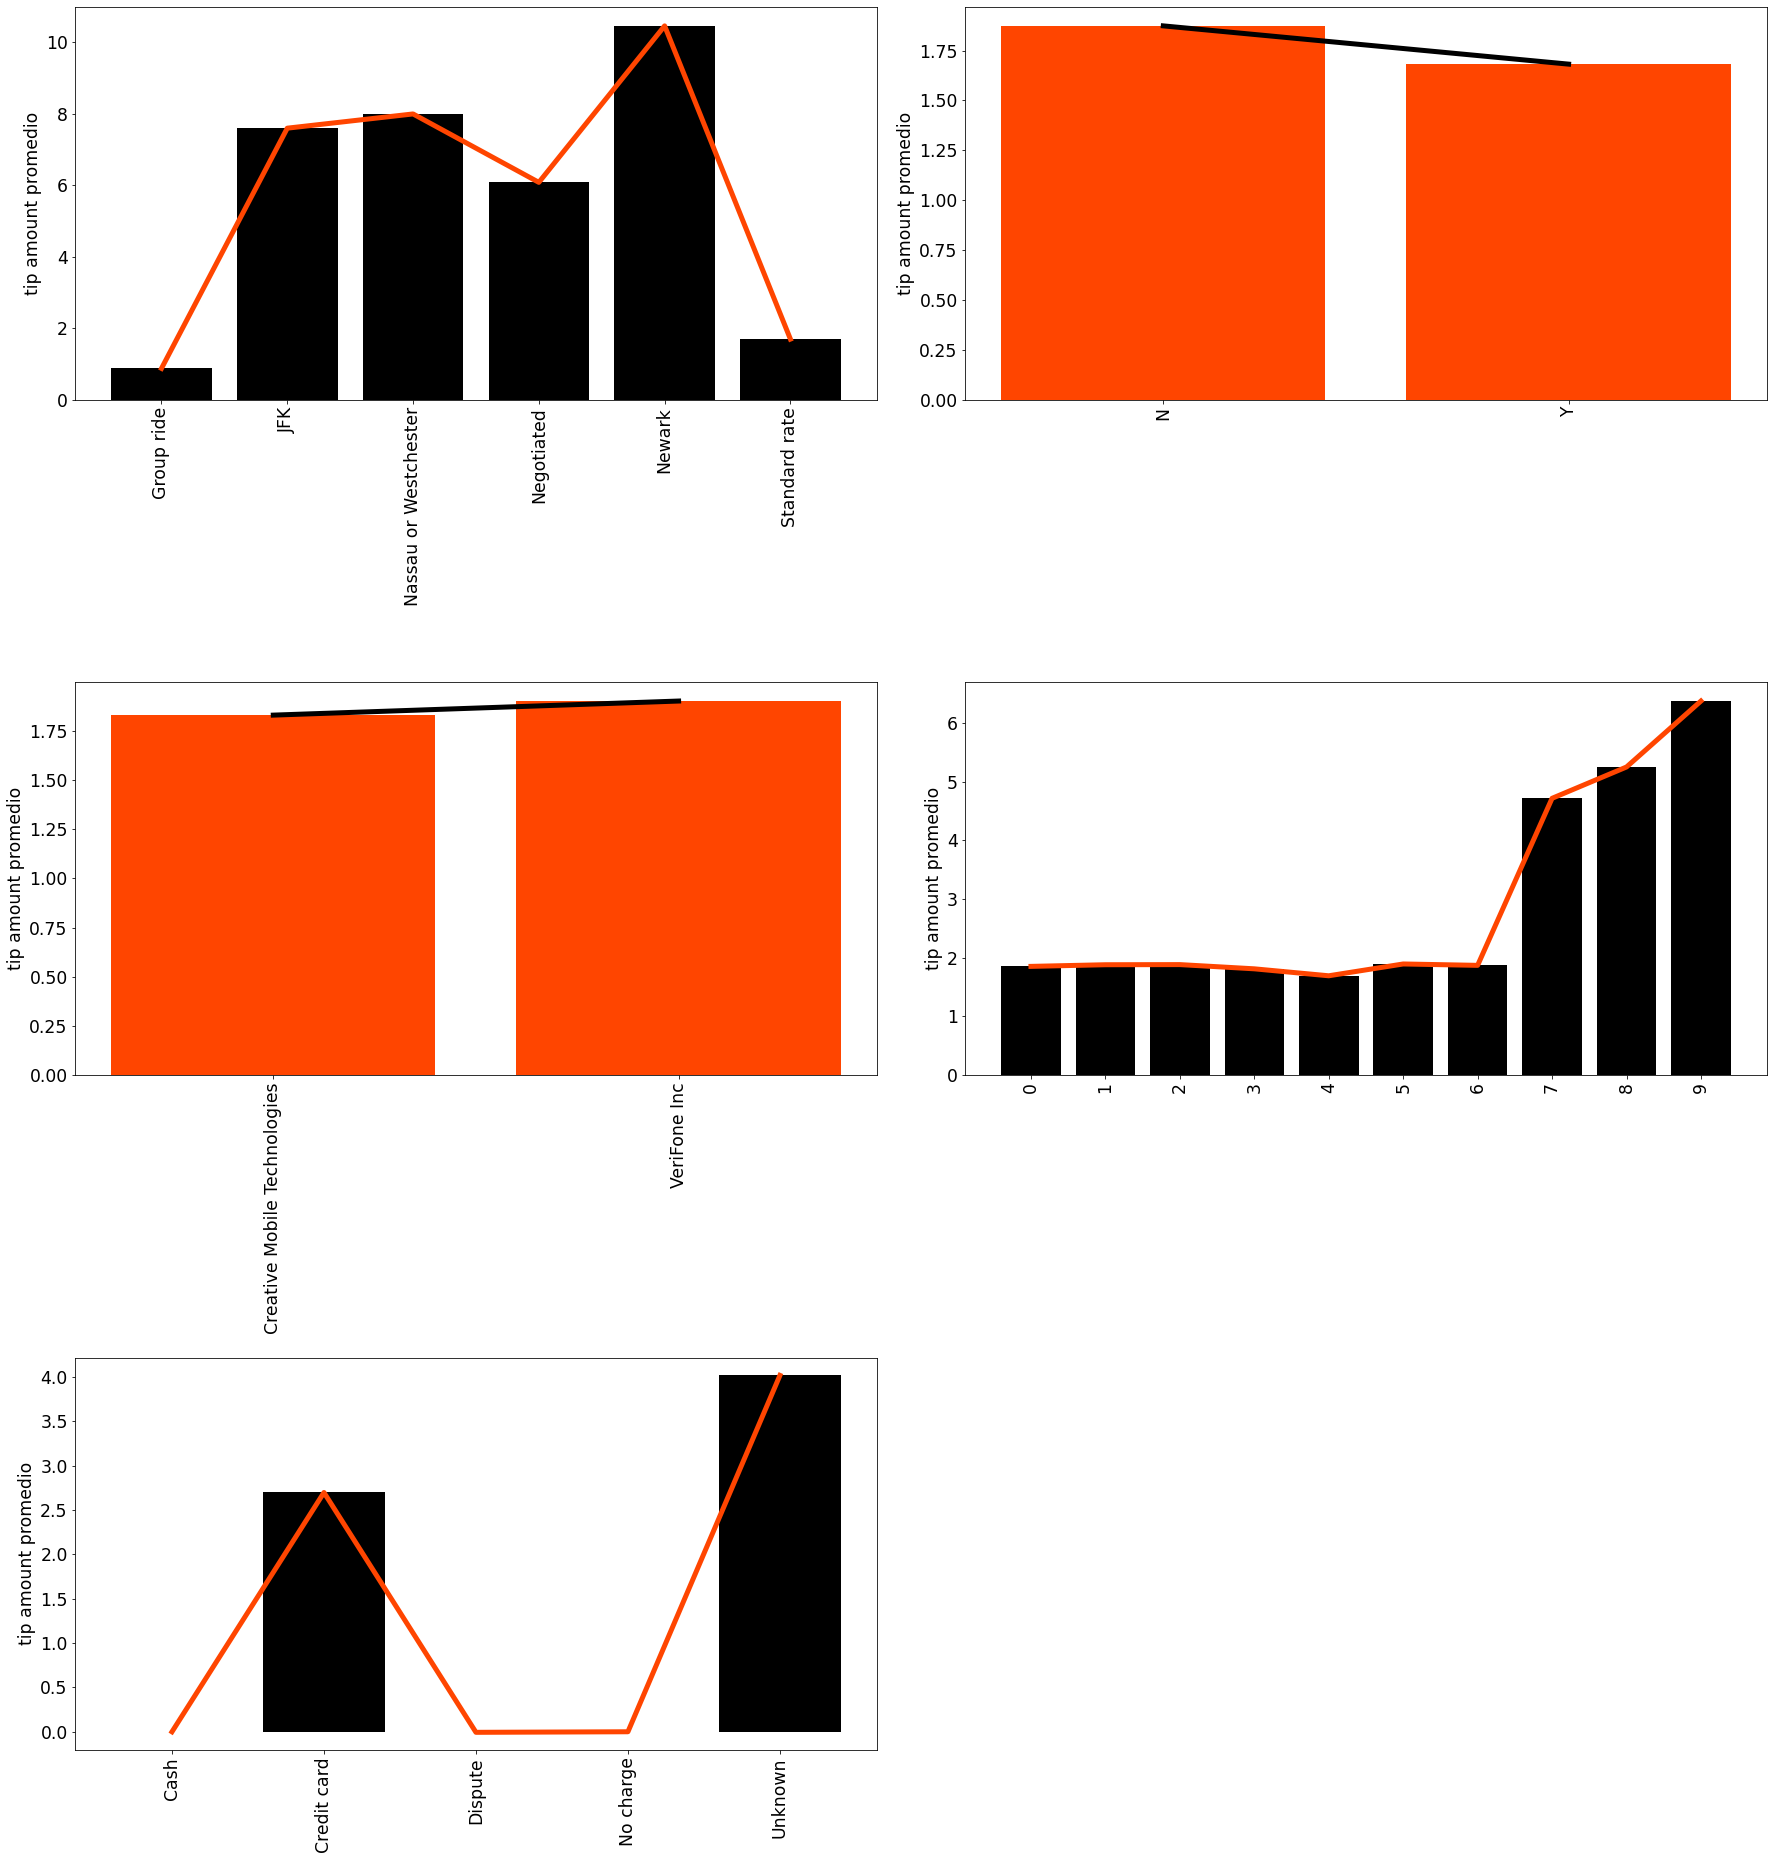

In [59]:
plt.subplots(figsize=(25,25))
colores=[b,o,o,b,b]
colores1=[o,b,b,o,o]
for x,y in enumerate(campos):
    plt.subplot(3,2,x+1)
    plt.tight_layout(pad = 2)
    z=df[[y,'tip_amount']].groupby(y).mean().head(10).reset_index()
    plt.plot(z[y],z.tip_amount,color=colores1[x],linewidth=5)
    plt.bar(z[y],z.tip_amount,linewidth=2,color=colores[x])
    
    if y=='passenger_count':
        plt.xticks(list(range(z[y].max()+1)),size='xx-large',rotation=90)
    else:
        plt.xticks(size='xx-large',rotation=90)
    
    plt.xticks(size='xx-large',rotation=90)
    plt.yticks(size='xx-large')
    plt.ylabel('tip amount promedio',size='xx-large')
plt.show()

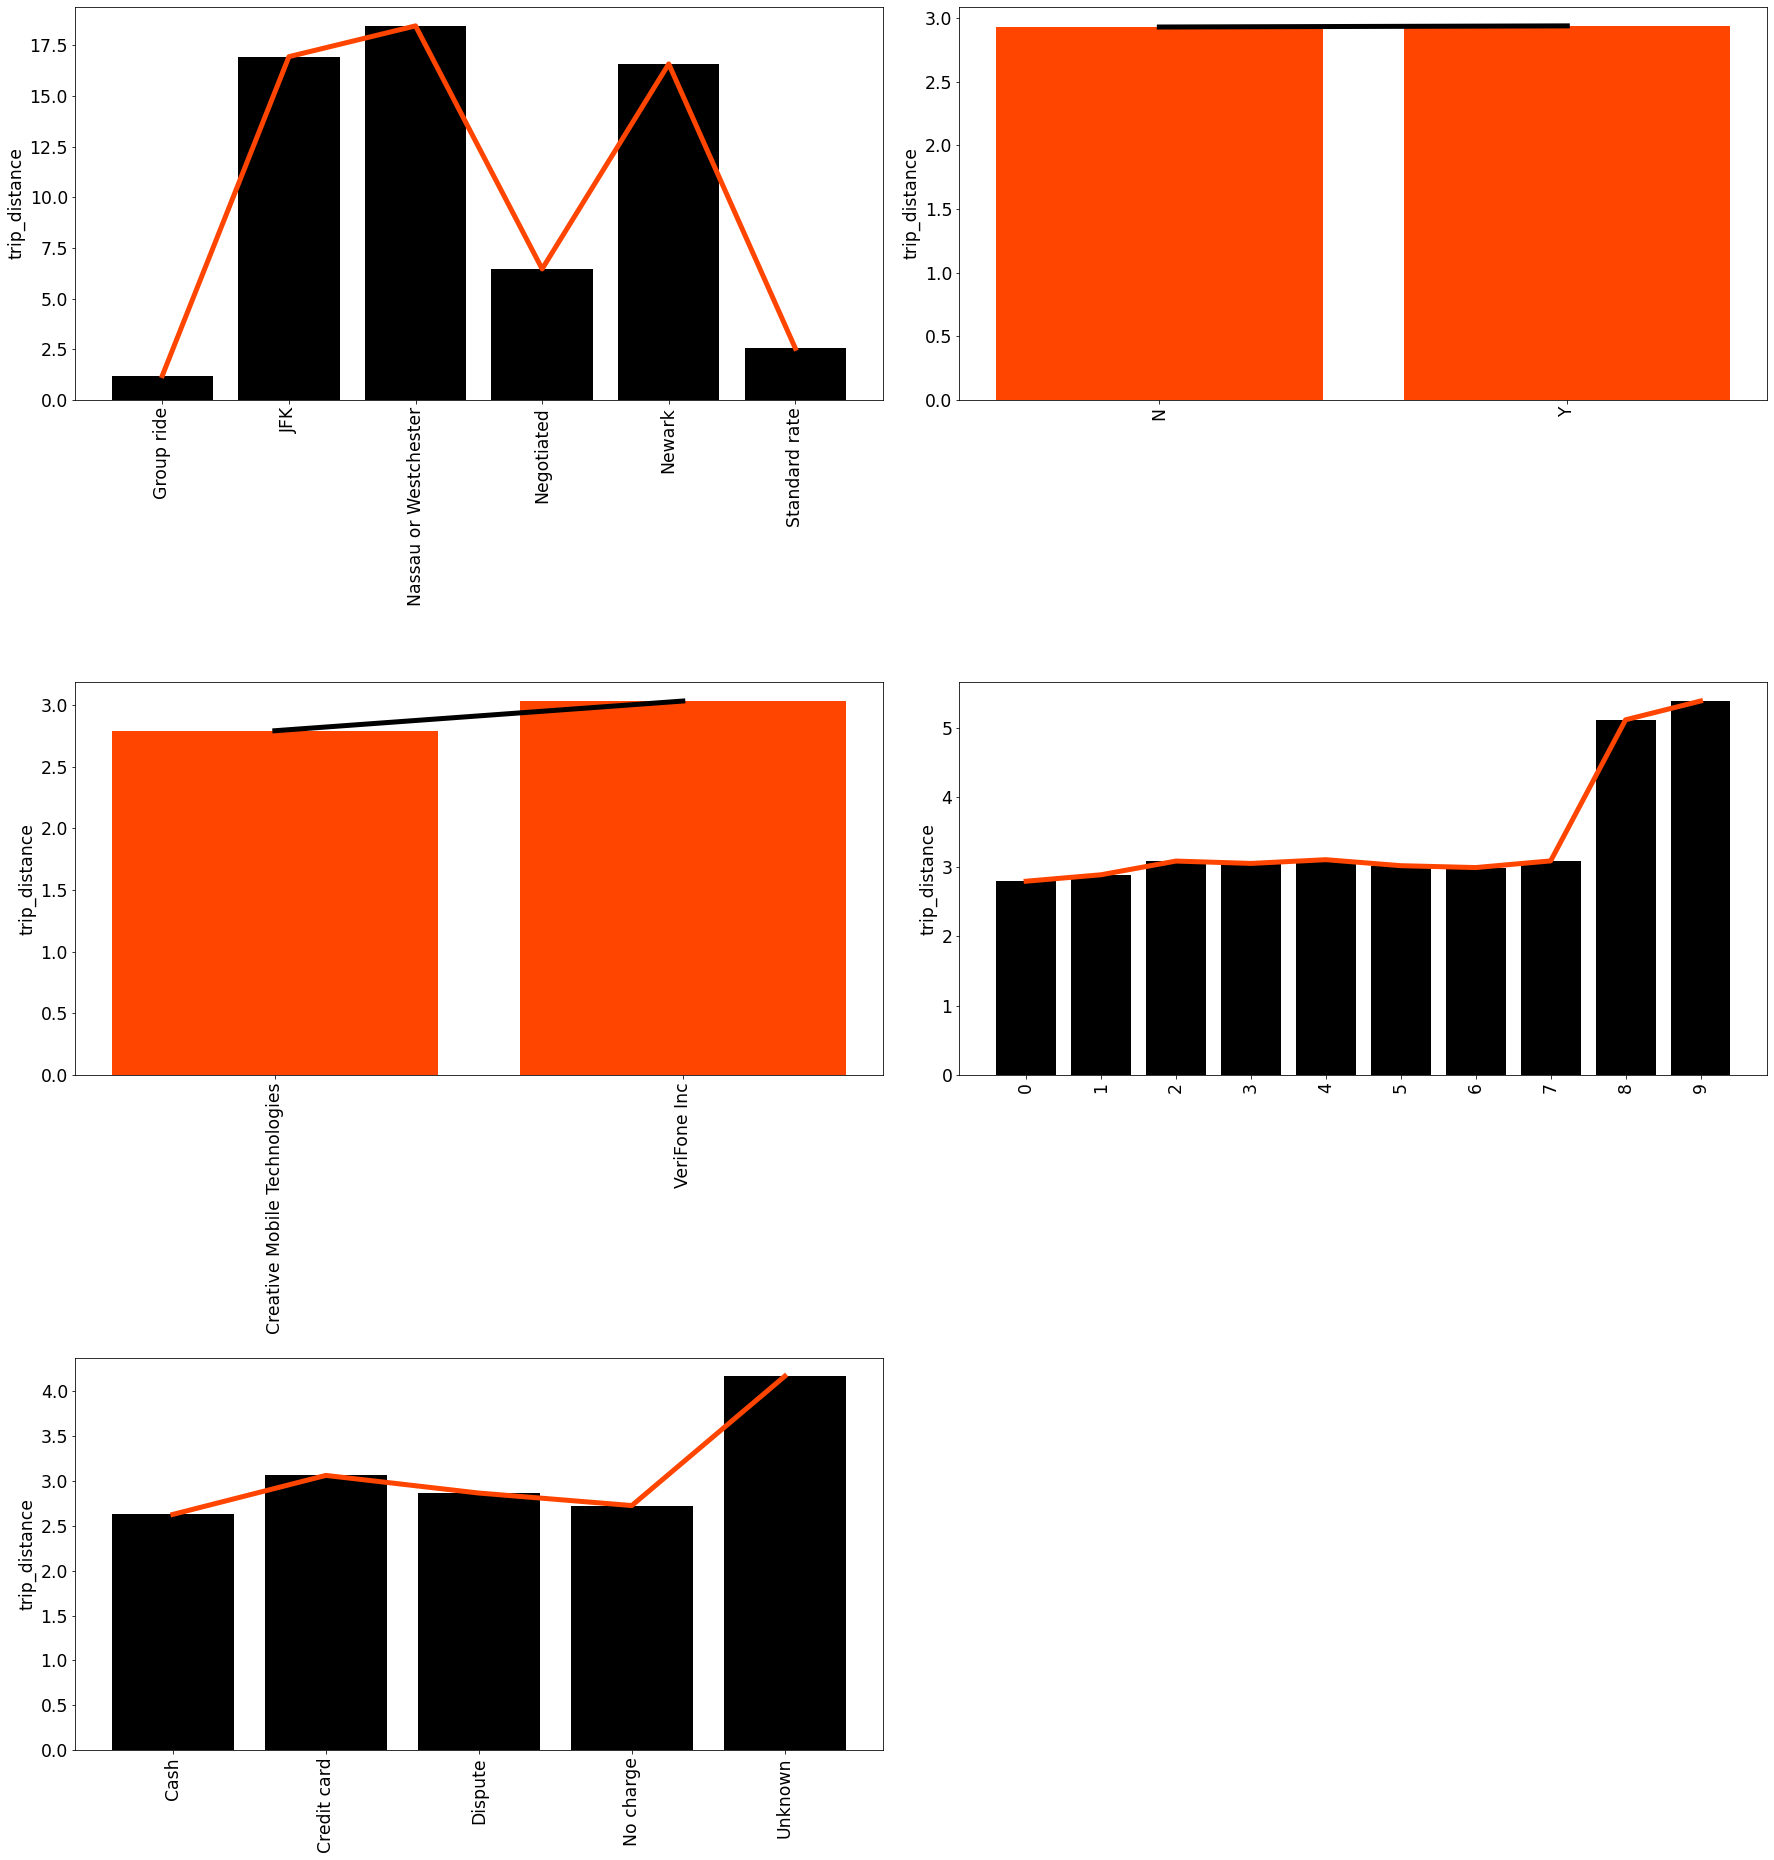

In [60]:
plt.subplots(figsize=(25,25))
colores=[b,o,o,b,b]
colores1=[o,b,b,o,o]
for x,y in enumerate(campos):
    plt.subplot(3,2,x+1)
    plt.tight_layout(pad = 2)
    z=df[[y,'trip_distance']].groupby(y).mean().head(10).reset_index()
    plt.plot(z[y],z.trip_distance,color=colores1[x],linewidth=5)
    plt.bar(z[y],z.trip_distance,linewidth=2,color=colores[x])
    
    if y=='passenger_count':
        plt.xticks(list(range(z[y].max()+1)),size='xx-large',rotation=90)
    else:
        plt.xticks(size='xx-large',rotation=90)
    
    plt.xticks(size='xx-large',rotation=90)
    plt.yticks(size='xx-large')
    plt.ylabel('trip_distance',size='xx-large')
plt.show()

/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


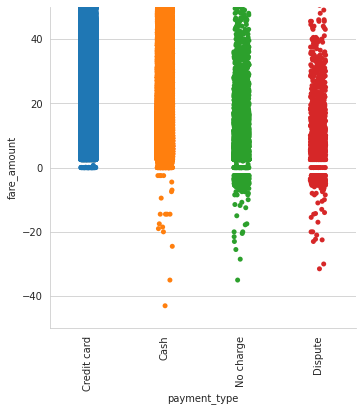

In [54]:
sns.set_style("whitegrid")
ax=sns.catplot('payment_type','fare_amount',data=df)
plt.xticks(rotation=90)
plt.ylim(-50,50)
plt.show()

/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


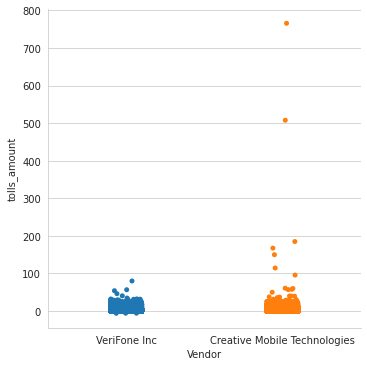

In [55]:
ax=sns.catplot('Vendor','tolls_amount',data=df) 
plt.show()

/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


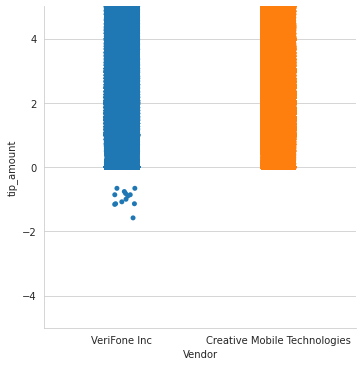

In [56]:
ax=sns.catplot('Vendor','tip_amount',data=df) 
plt.ylim(-5,5)
plt.show()

/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


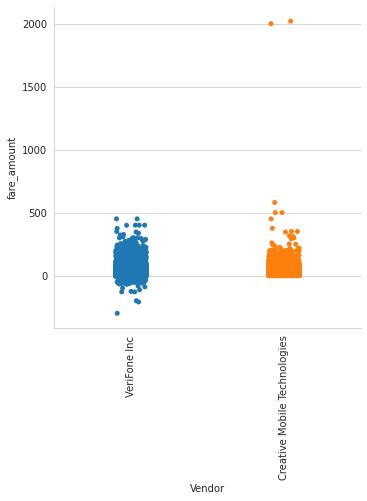

In [57]:
ax=sns.catplot('Vendor','fare_amount',data=df)  
plt.xticks(rotation=90)
#plt.ylim(-50,50)
plt.show()

/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


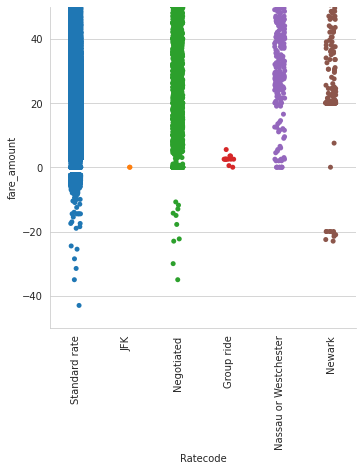

In [64]:
ax=sns.catplot('Ratecode','fare_amount',data=df) 
plt.xticks(rotation=90)
plt.ylim(-50,50)
plt.show()

/home/osvaldo/entornos/tsc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


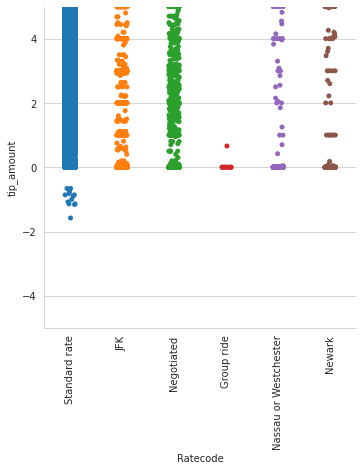

In [65]:
ax=sns.catplot('Ratecode','tip_amount',data=df)
plt.xticks(rotation=90)
plt.ylim(-5,5)
plt.show()